In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import linear_rainbow
import warnings
warnings.filterwarnings('ignore')


In [2]:
from tools import clean_sqft_basement, formula, evaluate_model, drop_outliers
from tools import print_column_info, drop_na

In [3]:
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
data = data.set_index('price').reset_index()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
data.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.dtypes

price            float64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
data.isna().sum()

price               0
id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
data.isna().sum()/data.shape[0]

price            0.000000
id               0.000000
date             0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [12]:
#print_column_info(data.waterfront)

# Try to clean missing values

In [13]:
columns_with_null = ['waterfront','view','yr_renovated']
data = drop_na(data,columns_with_null)
data.isna().sum()

price            0
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Convert 'sqft_basement' from the 'object' type to float

In [14]:
mean = data[data.sqft_basement != '?']['sqft_basement'].astype(float).mean()
mask = data['sqft_basement'].str.startswith('?')
data.loc[mask, 'sqft_basement'] = mean

In [15]:
#data.sqft_basement = data.sqft_basement.apply(clean_sqft_basement)
data.sqft_basement = data.sqft_basement.astype(float)

In [16]:
data.dtypes

price            float64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
data.head()

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.000000,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,604000.0,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.000000,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.000000,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,7237550310,5/12/2014,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.000000,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,1321400060,6/27/2014,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,291.811329,1995,0.0,98003,47.3097,-122.327,2238,6819


In [18]:
#data['price'].plot.kde()

In [19]:
#data.drop(data[data.price > 1.5*10**6].index, inplace=True)
#data['price'].plot.hist()

In [20]:
#data['price'].plot.kde()

In [21]:
#data['sqft_living'].plot.hist()

In [22]:
#print(data.sqft_living.mean(), data.sqft_living.std())
#idx = data[data['sqft_living'] > 5000].index
#data.drop(idx, inplace=True)
#data['sqft_living'].plot.hist()

In [23]:
#idx = data[data['sqft_living']==0].index
#data.drop(idx,inplace=True)
#idx = data[data['price']==0].index
#data.drop(idx,inplace=True)

In [24]:
#data['sqft_above'].plot.hist()

In [25]:
#idx = data[data.sqft_above > 5000].index
#data.drop(idx,inplace=True)
#data.sqft_above.plot.hist()

In [26]:
print_column_info(data['view'])

Unique values:
 [0. 3. 4. 2. 1.]
Value_counts:
 0.0    14241
2.0      688
3.0      348
1.0      245
4.0      240
Name: view, dtype: int64
Number of Null values:
 0


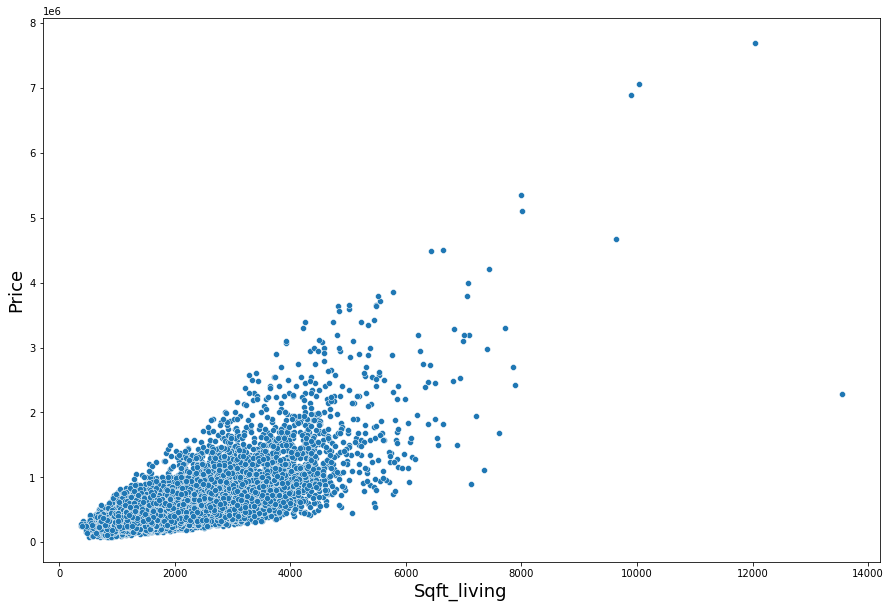

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xlabel('Sqft_living',fontsize=18)
plt.ylabel('Price',fontsize=18)
sns.scatterplot(data.sqft_living, data.price,ax=ax)
plt.show();

In [41]:
data['bath_bed'] = (data.bathrooms * data.bedrooms)
corr = data.drop('id',axis=1).corr()
print(corr)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.305489   0.526155     0.706189  0.084504  0.259505   
bedrooms       0.305489  1.000000   0.512243     0.573575  0.025460  0.180485   
bathrooms      0.526155  0.512243   1.000000     0.753846  0.080362  0.505187   
sqft_living    0.706189  0.573575   0.753846     1.000000  0.165336  0.359407   
sqft_lot       0.084504  0.025460   0.080362     0.165336  1.000000 -0.009924   
floors         0.259505  0.180485   0.505187     0.359407 -0.009924  1.000000   
view           0.396862  0.080577   0.180923     0.285506  0.077073  0.027518   
condition      0.034367  0.020074  -0.130287    -0.062319 -0.016036 -0.261013   
grade          0.664146  0.354243   0.664748     0.764251  0.108950  0.459843   
sqft_above     0.612014  0.474272   0.685677     0.876176  0.174216  0.529101   
sqft_basement  0.317332  0.298191   0.277160     0.430735  0.016733 -0.239377   
yr_built       0.049345  0.1

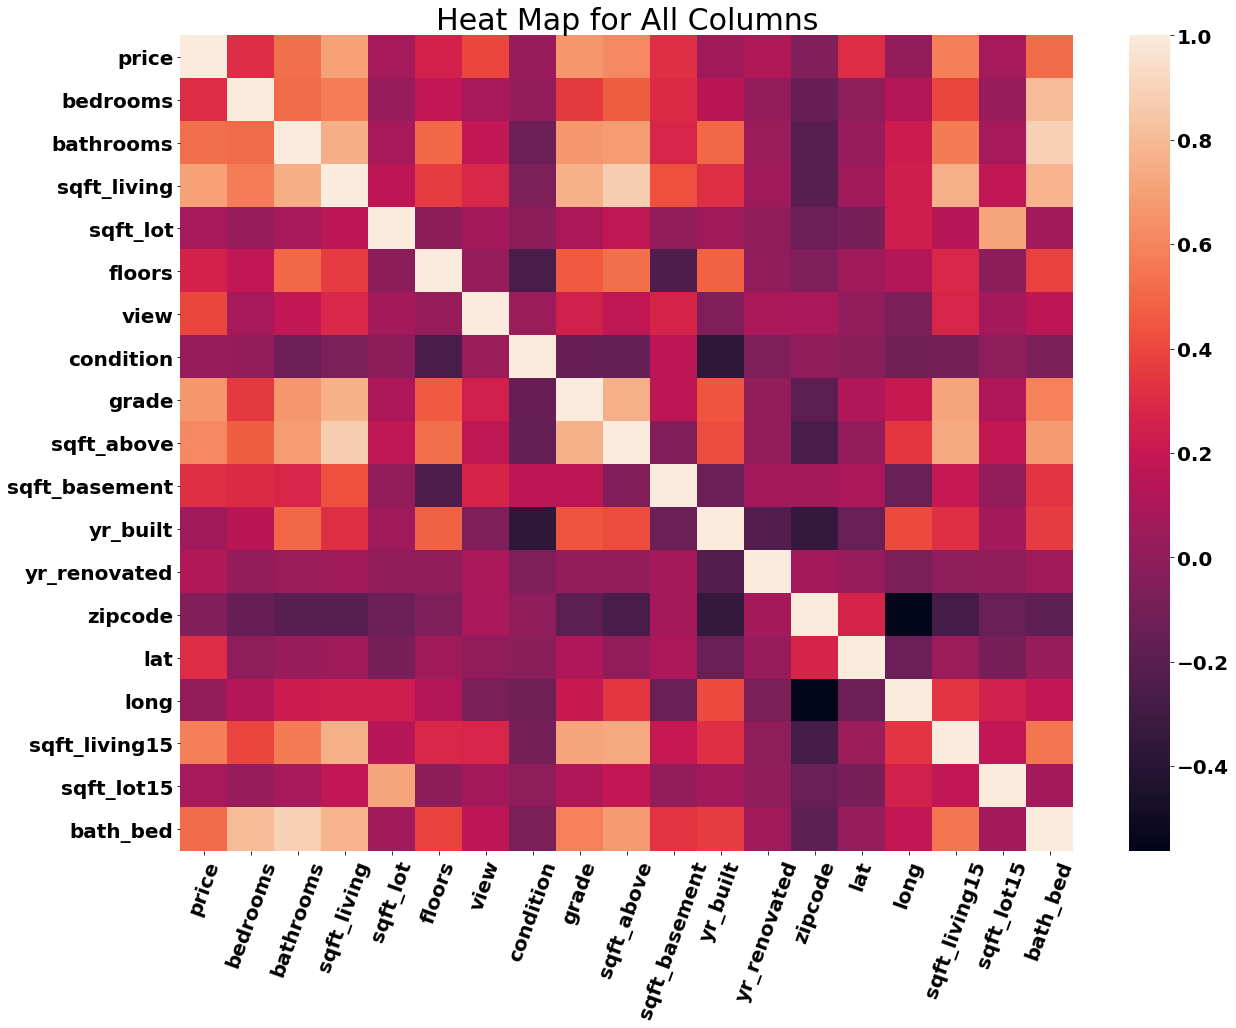

In [44]:
fig0, ax0 = plt.subplots(figsize=(20,15))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.xlabel("Genres",fontsize=25)
x = list(data.columns)
x_pos = [i for i, _ in enumerate(x)]
plt.title("Heat Map for All Columns",fontsize=30)
heat = sns.heatmap(corr,ax=ax0)
heat.set_xticklabels(heat.get_xticklabels(), rotation=70)
plt.savefig('images/heat_map.png',bbox_inches='tight')

In [30]:
from src.tools import convert_number_to_month
data['month']= pd.DatetimeIndex(data['date']).month
data['month'] = data['month'].apply(convert_number_to_month)
data['month'] = data['month'].astype('category')
#data['view'] = data['view'].astype('category')
#data['grade'] = data['grade'].astype('category')
data['waterfront'] = data.waterfront.astype('category')
#data['bathrooms'] = data.bathrooms.astype('category')
data.head()

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bath_bed,month
1,538000.0,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,...,400.000000,1951,1991.0,98125,47.7210,-122.319,1690,7639,6.75,Dec
3,604000.0,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,...,910.000000,1965,0.0,98136,47.5208,-122.393,1360,5000,12.00,Dec
4,510000.0,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,...,0.000000,1987,0.0,98074,47.6168,-122.045,1800,7503,6.00,Feb
5,1230000.0,7237550310,5/12/2014,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.000000,2001,0.0,98053,47.6561,-122.005,4760,101930,18.00,May
6,257500.0,1321400060,6/27/2014,3,2.25,1715,6819,2.0,0.0,0.0,...,291.811329,1995,0.0,98003,47.3097,-122.327,2238,6819,6.75,Jun


------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     3281.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:42:34   Log-Likelihood:            -2.1746e+05
No. Observations:               15762   AIC:                         4.349e+05
Df Residuals:                   15754   BIC:                         4.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025

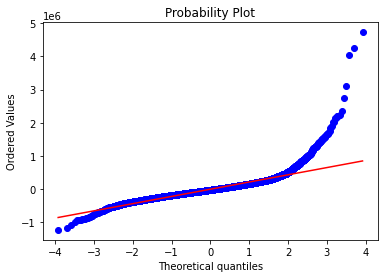

	DESTRIBUTIONS PLOT OF RESIDUALS



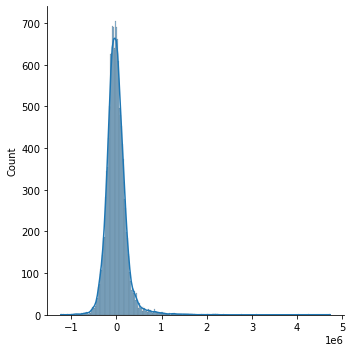

D_Agostino Test for Normality:
stat=11829.024, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


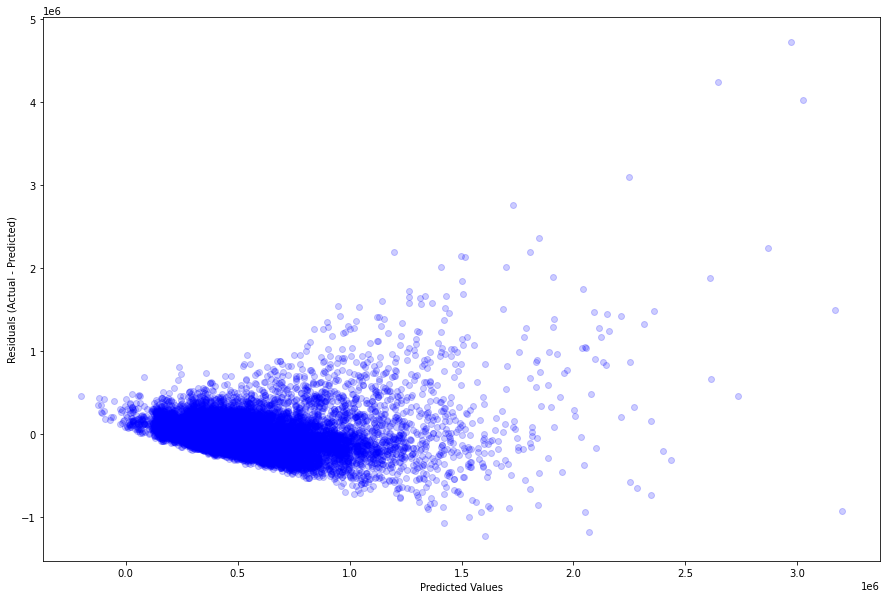

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 1916.2412412393865  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------
	 ------------------------------------------------------------
	 CHECK MULTICOLLINEARITY ASSUMPTIONS:
	 -------------------------------------------

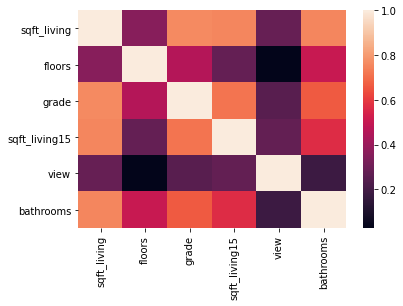


 ************************************************************ 
CORRELATON MATRIX
                sqft_living    floors     grade  sqft_living15      view  \
sqft_living       1.000000  0.359407  0.764251       0.756676  0.285506   
floors            0.359407  1.000000  0.459843       0.281982  0.027518   
grade             0.764251  0.459843  1.000000       0.717031  0.248679   
sqft_living15     0.756676  0.281982  0.717031       1.000000  0.277778   
view              0.285506  0.027518  0.248679       0.277778  1.000000   
bathrooms         0.753846  0.505187  0.664748       0.569290  0.180923   

               bathrooms  
sqft_living     0.753846  
floors          0.505187  
grade           0.664748  
sqft_living15   0.569290  
view            0.180923  
bathrooms       1.000000  

 ************************************************************ 

         VIF           variable
0  62.665452          Intercept
1   1.203882  waterfront[T.1.0]
2   4.144092        sqft_living
3   1.453

In [31]:
df = data[['price','sqft_living','floors','grade','sqft_living15','view','waterfront','bathrooms']]
evaluate_model(df,target_column='price',multicollinearity=True)

# Dropping outliers

In [32]:
from src.tools import drop_outliers
new_df = df.copy()
print(new_df.shape)
for item in ['sqft_living','sqft_living15','price']:
    new_df = drop_outliers(new_df,target=item)
print(new_df.shape)

(15762, 8)
(15133, 8)


------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2200.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:42:41   Log-Likelihood:            -2.0526e+05
No. Observations:               15133   AIC:                         4.105e+05
Df Residuals:                   15125   BIC:                         4.106e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025

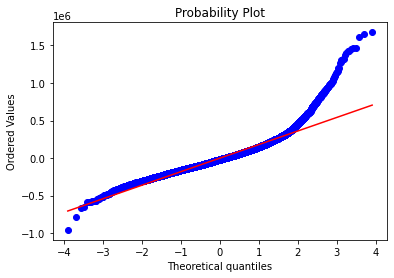

	DESTRIBUTIONS PLOT OF RESIDUALS



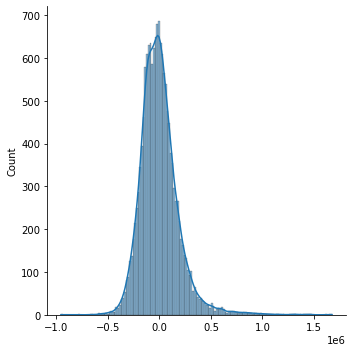

D_Agostino Test for Normality:
stat=5247.054, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


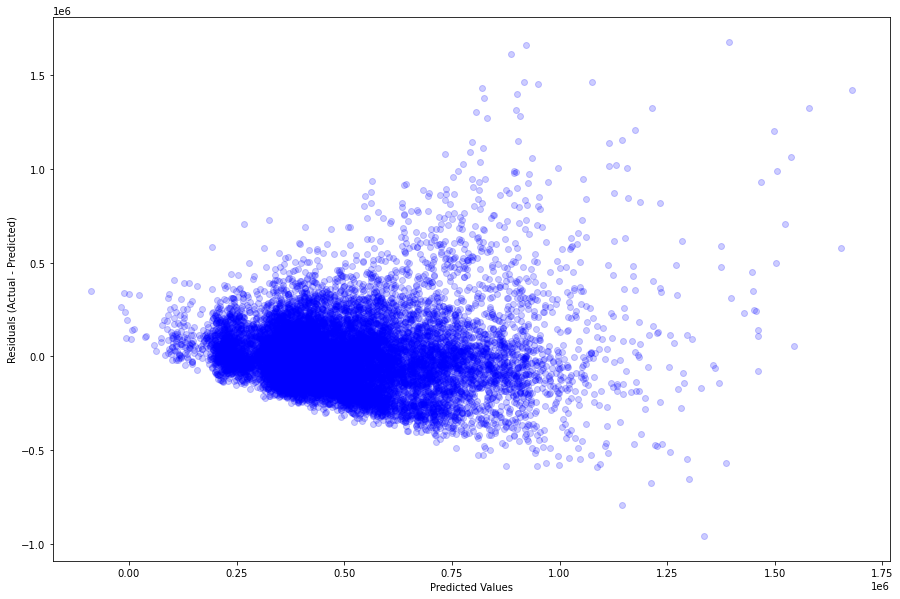

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 1482.9805824726295  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------


In [33]:
evaluate_model(new_df, target_column='price',multicollinearity=False)

# Apply Normalization

In [34]:
for item in ['sqft_living','sqft_living15','price']:
    new_df[item], t = stats.boxcox(new_df[item])


------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     3281.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:42:48   Log-Likelihood:            -2.1746e+05
No. Observations:               15762   AIC:                         4.349e+05
Df Residuals:                   15754   BIC:                         4.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025

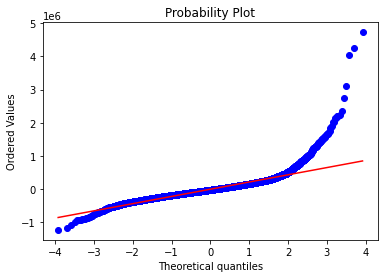

	DESTRIBUTIONS PLOT OF RESIDUALS



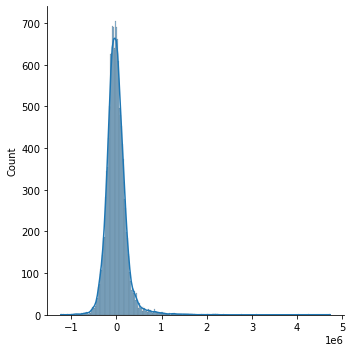

D_Agostino Test for Normality:
stat=11829.024, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


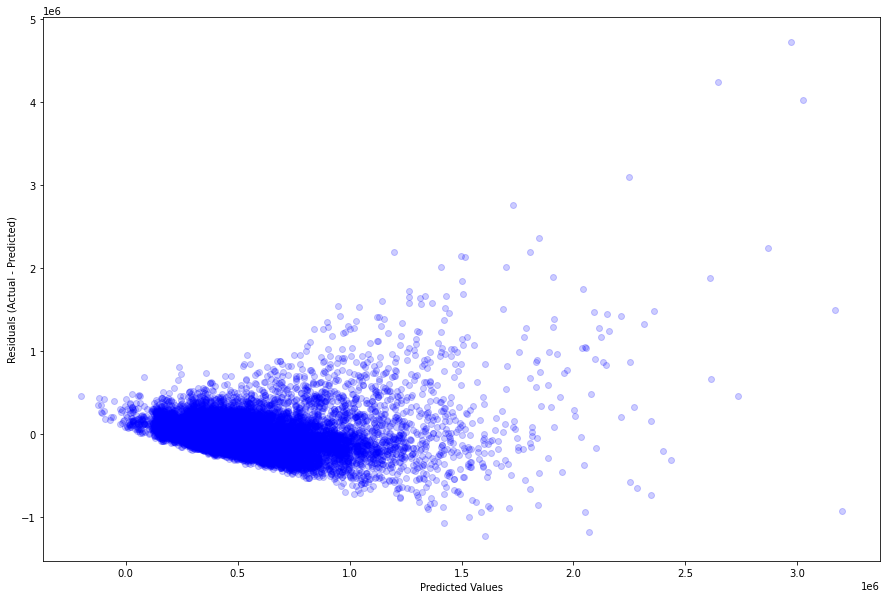

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 1916.2412412393865  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------
	 ------------------------------------------------------------
	 CHECK MULTICOLLINEARITY ASSUMPTIONS:
	 -------------------------------------------

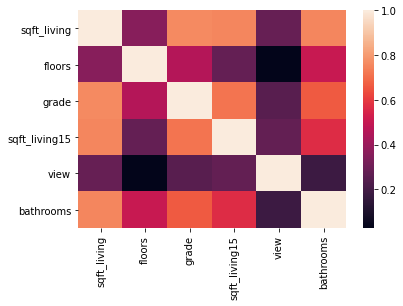


 ************************************************************ 
CORRELATON MATRIX
                sqft_living    floors     grade  sqft_living15      view  \
sqft_living       1.000000  0.359407  0.764251       0.756676  0.285506   
floors            0.359407  1.000000  0.459843       0.281982  0.027518   
grade             0.764251  0.459843  1.000000       0.717031  0.248679   
sqft_living15     0.756676  0.281982  0.717031       1.000000  0.277778   
view              0.285506  0.027518  0.248679       0.277778  1.000000   
bathrooms         0.753846  0.505187  0.664748       0.569290  0.180923   

               bathrooms  
sqft_living     0.753846  
floors          0.505187  
grade           0.664748  
sqft_living15   0.569290  
view            0.180923  
bathrooms       1.000000  

 ************************************************************ 

         VIF           variable
0  62.665452          Intercept
1   1.203882  waterfront[T.1.0]
2   4.144092        sqft_living
3   1.453

In [35]:
evaluate_model(df,target_column='price',multicollinearity=True)

# Applying log transformation on "price"

In [36]:
new_df['price'] = np.log10(new_df.price)

------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     2109.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:42:58   Log-Likelihood:                 57106.
No. Observations:               15133   AIC:                        -1.142e+05
Df Residuals:                   15125   BIC:                        -1.141e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025

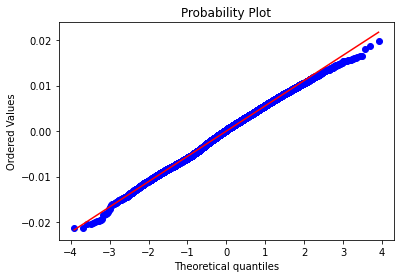

	DESTRIBUTIONS PLOT OF RESIDUALS



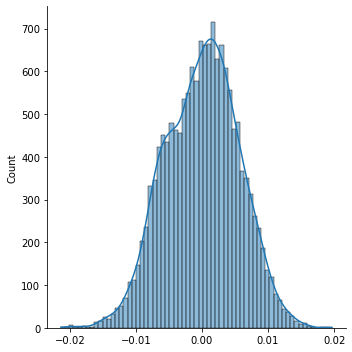

D_Agostino Test for Normality:
stat=66.059, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


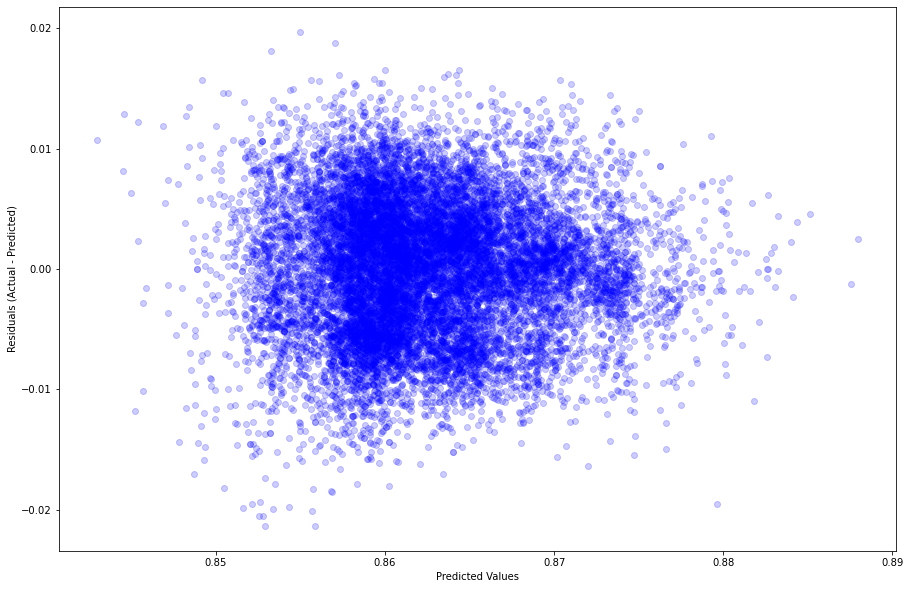

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 353.38909342609423  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------
	 ------------------------------------------------------------
	 CHECK MULTICOLLINEARITY ASSUMPTIONS:
	 -------------------------------------------

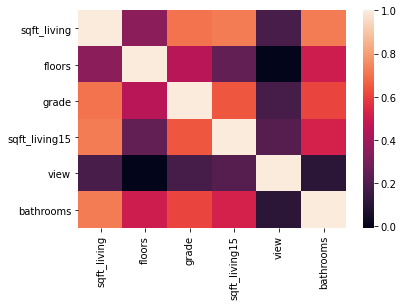


 ************************************************************ 
CORRELATON MATRIX
                sqft_living    floors     grade  sqft_living15      view  \
sqft_living       1.000000  0.345179  0.702102       0.723950  0.187963   
floors            0.345179  1.000000  0.450519       0.245695 -0.006107   
grade             0.702102  0.450519  1.000000       0.646128  0.179070   
sqft_living15     0.723950  0.245695  0.646128       1.000000  0.220513   
view              0.187963 -0.006107  0.179070       0.220513  1.000000   
bathrooms         0.723005  0.501364  0.607404       0.522669  0.109793   

               bathrooms  
sqft_living     0.723005  
floors          0.501364  
grade           0.607404  
sqft_living15   0.522669  
view            0.109793  
bathrooms       1.000000  

 ************************************************************ 

           VIF           variable
0  1771.165269          Intercept
1     1.179609  waterfront[T.1.0]
2     3.497124        sqft_living
3

In [37]:
evaluate_model(new_df,target_column='price',multicollinearity=True)

# Try to exponintiate independent variables

------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     2152.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        18:43:13   Log-Likelihood:                 7491.8
No. Observations:               15133   AIC:                        -1.497e+04
Df Residuals:                   15125   BIC:                        -1.491e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025

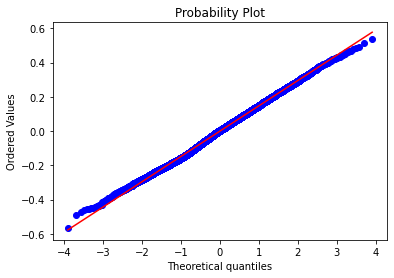

	DESTRIBUTIONS PLOT OF RESIDUALS



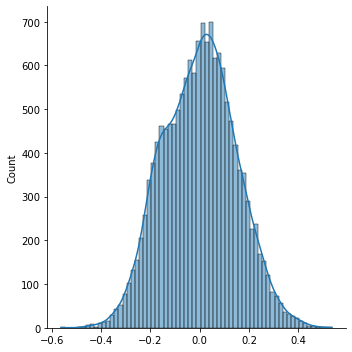

D_Agostino Test for Normality:
stat=58.284, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


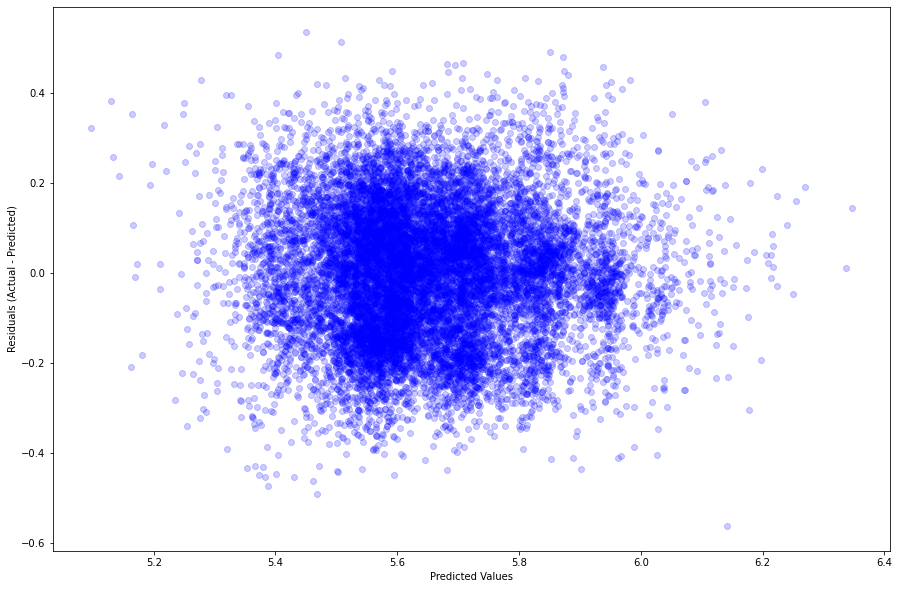

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 163.11142927486028  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------
	 ------------------------------------------------------------
	 CHECK MULTICOLLINEARITY ASSUMPTIONS:
	 -------------------------------------------

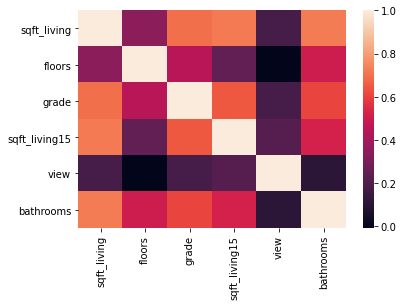


 ************************************************************ 
CORRELATON MATRIX
                sqft_living    floors     grade  sqft_living15      view  \
sqft_living       1.000000  0.344254  0.693914       0.718601  0.180476   
floors            0.344254  1.000000  0.450519       0.246515 -0.006107   
grade             0.693914  0.450519  1.000000       0.648459  0.179070   
sqft_living15     0.718601  0.246515  0.648459       1.000000  0.221814   
view              0.180476 -0.006107  0.179070       0.221814  1.000000   
bathrooms         0.724147  0.501364  0.607404       0.522534  0.109793   

               bathrooms  
sqft_living     0.724147  
floors          0.501364  
grade           0.607404  
sqft_living15   0.522534  
view            0.109793  
bathrooms       1.000000  

 ************************************************************ 

           VIF           variable
0  1025.189845          Intercept
1     1.179626  waterfront[T.1.0]
2     3.411811        sqft_living
3

In [38]:
new_df = df[list(df.columns)]
for item in ['sqft_living','sqft_living15','price']:
    new_df = drop_outliers(new_df,target=item)
new_df.price = np.log10(new_df.price)
new_df.sqft_living = np.log10(new_df.sqft_living)
new_df.sqft_living15 = np.log10(new_df.sqft_living15)
evaluate_model(new_df,target_column='price', multicollinearity=True)

# END EXPERIMENT

In [39]:
df = data[['price', 'sqft_living','bath_bed',
           'view','grade',
           'sqft_living15']]

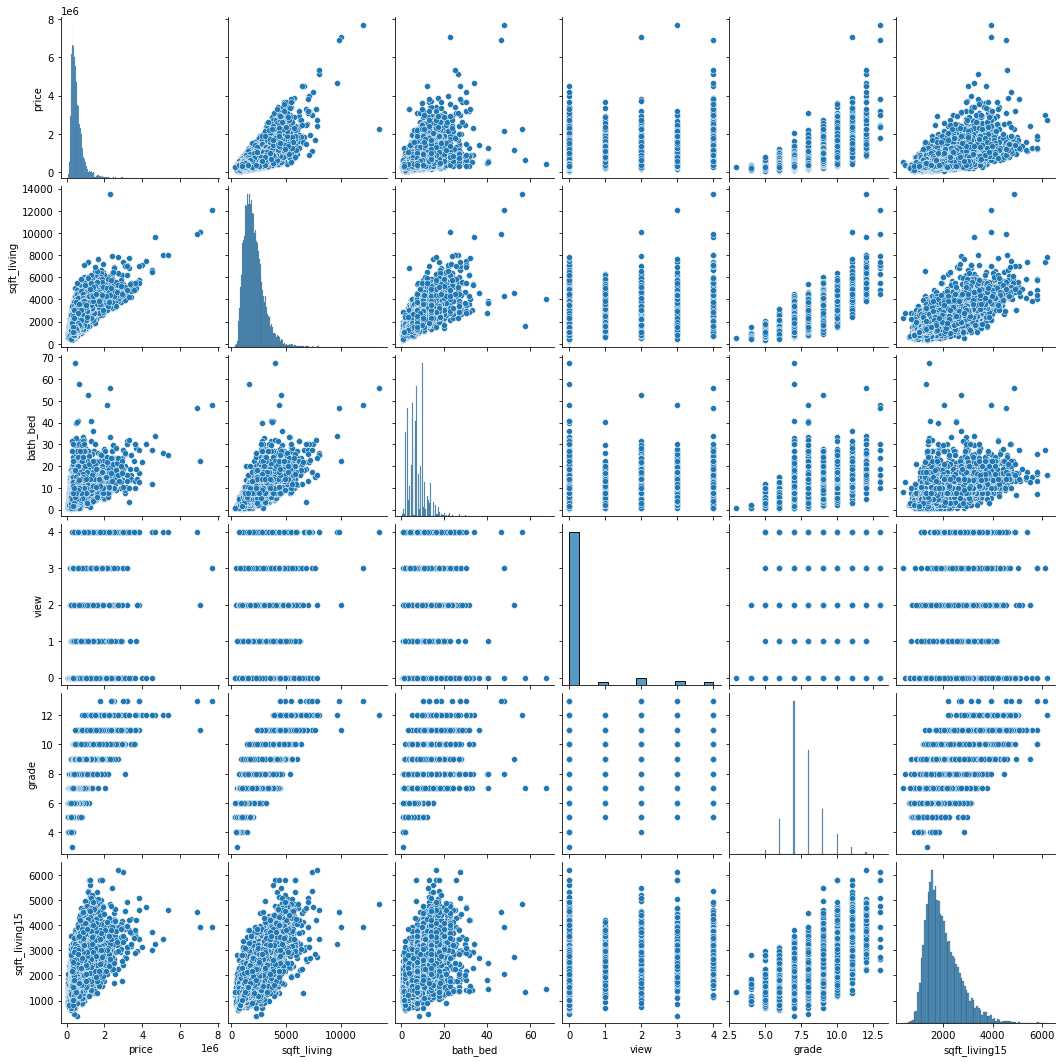

In [40]:
sns.pairplot(df)

------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        10:13:25   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      

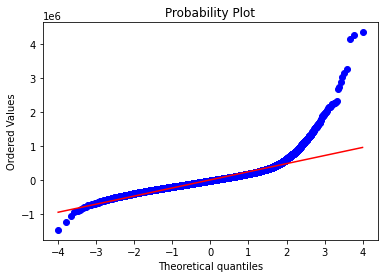

	DESTRIBUTIONS PLOT OF RESIDUALS



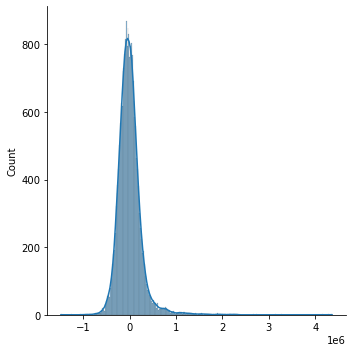

D_Agostino Test for Normality:
stat=14801.942, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


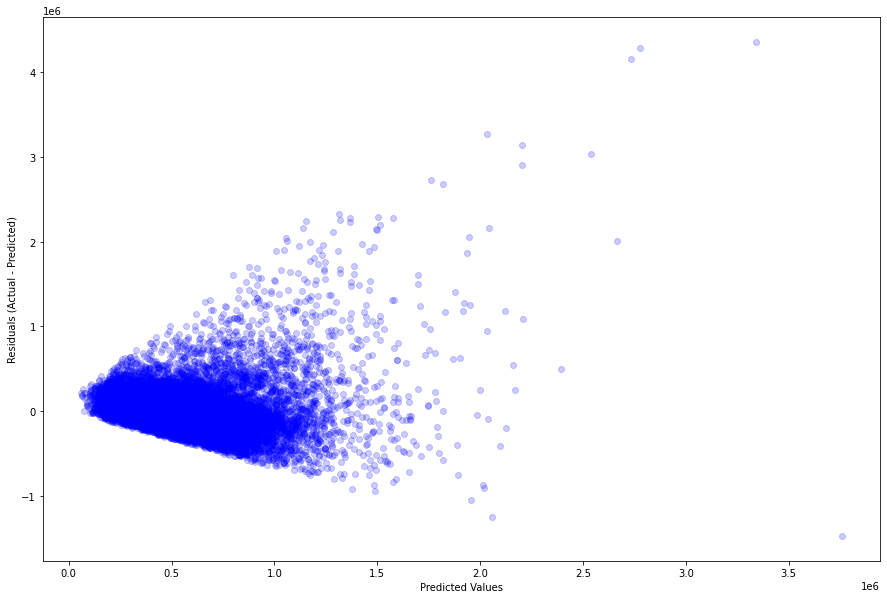

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 2445.778172504716  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------


In [6]:
new_df = data[['price','sqft_living']]
#fitted_data, fitted_lambda = stats.boxcox(new_df['sqft_living'])
#new_df['sqft_living'] = fitted_data
#new_df['price'], fitted_lambda = stats.boxcox(new_df.price)
#new_df.price = new_df.price**4
#new_df.grade = new_df.grade**2
#new_df.sqft_living = new_df.sqft_living**1.1
#new_df.price = np.log(new_df.price)
#new_df.sqft_living = new_df.sqft_living / new_df.sqft_living.max()
evaluate_model(new_df, target_column='price')

In [65]:
new_df = data[['price','sqft_living']].copy()
new_df = drop_outliers(new_df, target='price')
new_df = drop_outliers(new_df, target='sqft_living')
new_df.price = np.log(new_df.price)
new_df.sqft_living = new_df.sqft_living**0.78
#new_df.sqft_living = np.log10(new_df.sqft_living)

------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        10:23:36   Log-Likelihood:                -9436.4
No. Observations:               21349   AIC:                         1.888e+04
Df Residuals:                   21347   BIC:                         1.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      

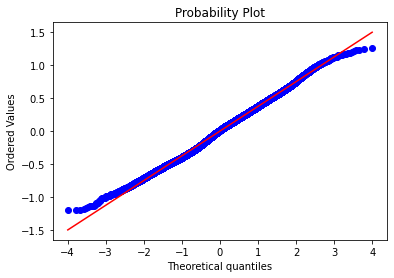

	DESTRIBUTIONS PLOT OF RESIDUALS



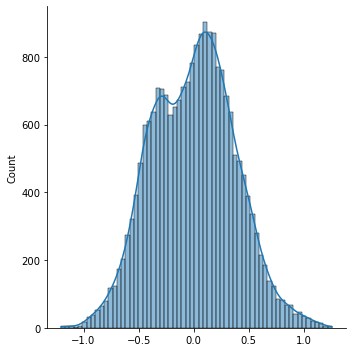

D_Agostino Test for Normality:
stat=90.032, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


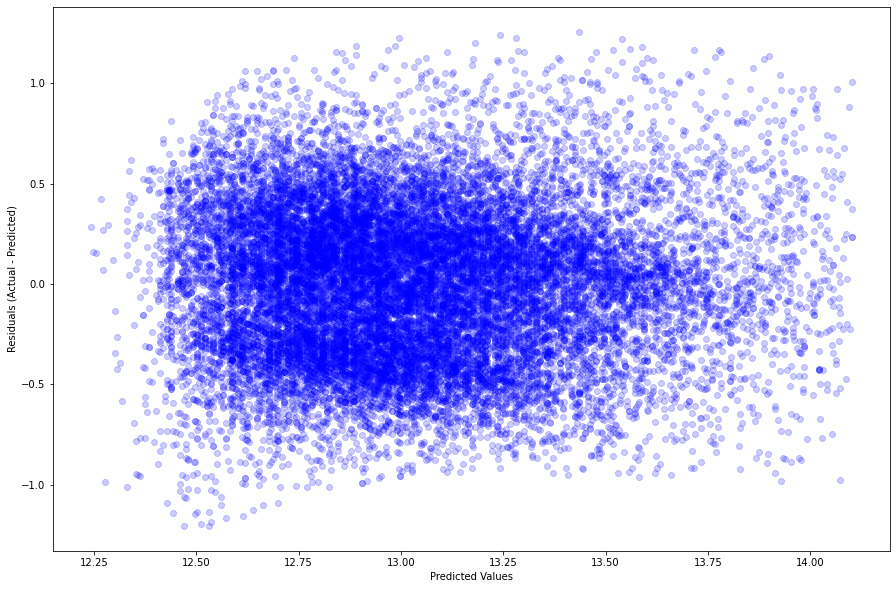

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
	 ------------------------------------------------------------
	 CHECK IF WE HAVE HETEROSCEDASTICTY IN THE MODEL :
	 ------------------------------------------------------------
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 3.8471893560934074  and the corresponding p-value is 0.04983.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.
	 ------------------------------------------------------------


In [66]:
evaluate_model(new_df,target_column='price')

# Model Evaluation

We are only explaining about 59% of the variance in price, for the only feature "sqft_living" and it is statistically significant at an $\alpha =0.05$
<br>
We claim that according to our model:
* our intercept is negative
* if we increase square footage of the living area by 1ft the price of the house will go up by 275 dollars.

In [91]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.49268789904035093
----------
Beta values of FSM:
Intercept     -43988.892194
sqft_living      280.863014
dtype: float64


In [92]:
# Your code here
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.0880045442869073 P_Value = 5.8947614341769625e-06


# The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. Thus returning a high p-value of $0.38 > 0.05= \alpha$   means that the current model satisfies the linearity assumption. 
* Since our P_value is bigger than $\alpha$ we don't have enough evidences to reject the Null_Hypothesis 

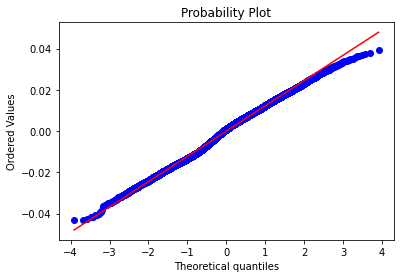

In [54]:
# Create a qq-plot
stats.probplot(fsm.resid, dist='norm',plot=pylab);

# Normaility 
The Jarque-Bera test is performed:
The Null_Hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. Thus returning a low p-value means that the current model violates the normality assumption.

In [111]:
y = df['price']
y_hat = fsm.predict()
type(y_hat)

NameError: name 'fsm' is not defined

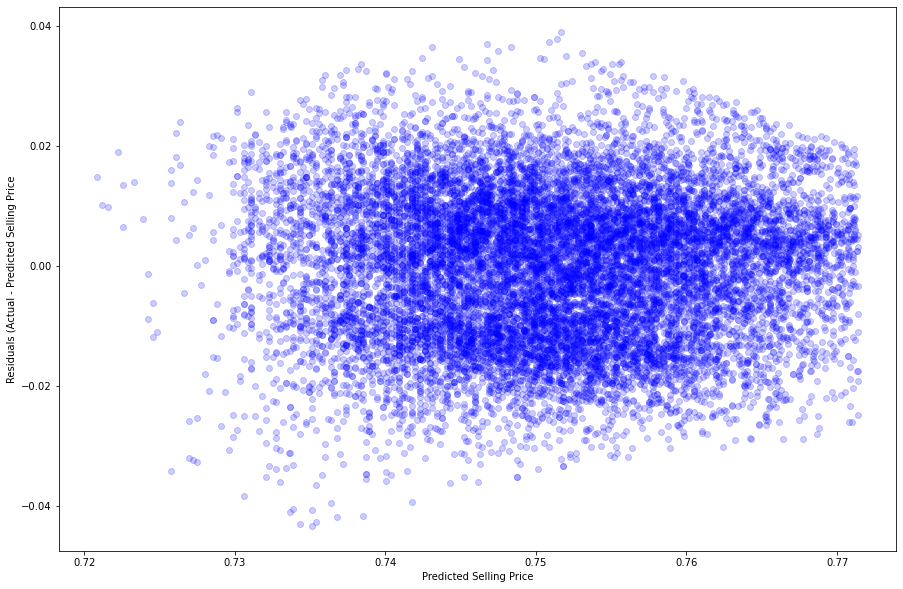

In [56]:
fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax2.scatter(x=fsm.predict(),y=fsm.resid, color='blue', alpha=0.2);

In [57]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = het_breuschpagan(fsm.resid, fsm.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 134.9761690984118),
 ('p-value', 3.3415561216148873e-31),
 ('f-value', 136.19153915007243),
 ('f p-value', 2.479787446655585e-31)]

# A Breusch-Pagan test uses the following null and alternative hypotheses:

The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

We see that the Lagrange multiplier statistic for the test is 920 and the corresponding p-value is $3.233e^{-202}$. Because this p-value is less than $\alpha = 0.05$, we have enough evidence to reject the null hypothesis. We have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [59]:
test[0]

134.9761690984118

In [32]:
from src.tools import formula,evaluate_model

In [33]:
evaluate_model(df[['price','sqft_living','grade']],target_column='price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     7524.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        10:51:19   Log-Likelihood:            -2.0690e+05
No. Observations:               15337   AIC:                         4.138e+05
Df Residuals:                   15334   BIC:                         4.138e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.05e+05   1.13e+04    -35.793      

# Model Evaluation

In [41]:
rainbow_statistic, rainbow_p_value = linear_rainbow(result)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.0011677891953115 P_Value = 0.4796256491157278


# Normality

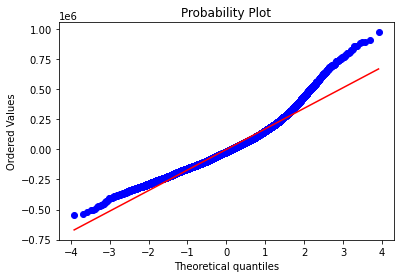

In [42]:
stats.probplot(result.resid, dist='norm',plot=pylab)
pylab.show()

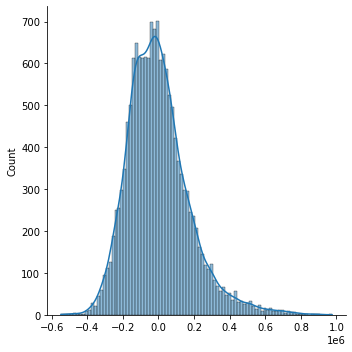

In [44]:
ax = sns.displot(result.resid,kde=True)

# Define different normality tests
* Shapiro-Wilk Test
* D’Agostino’s K-squared test

In [45]:
def shapiro_wilk(result):
    print("Shapiro-Wilk")
    stat, p = shapiro(result.resid)
    print(f'stat={stat:.3f}, p={p:.3f}')
    
    if p > 0.05:
        print('Probability is Normal')
    else:
        print('Probability is not Normal')
def D_Agostino(result):
    print("D_Agostino:")
    stat, p = normaltest(result.resid)
    print(f'stat={stat:.3f}, p={p:.3f}')
    
    if p > 0.05:
        print('Probability is Normal')
    else:
        print('Probability is not Normal')
    

In [46]:
shapiro_wilk(result)
D_Agostino(result)

Shapiro-Wilk
stat=0.957, p=0.000
Probability is not Normal
D_Agostino:
stat=2329.475, p=0.000
Probability is not Normal


/Users/yevgeniykostrov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Close up on 'grade'

In [233]:
df.columns

Index(['price', 'sqft_living', 'bath_bed', 'view', 'grade', 'sqft_living15'], dtype='object')

In [234]:
X = df[['sqft_living','grade', 'bath_bed','view','sqft_living15']]
X['grade'] = X.grade.astype('category')
X.sqft_living = sm.(X.sqft_living)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

<ipython-input-234-16da5f37f870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['grade'] = X.grade.astype('category')
/Users/yevgeniykostrov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,sqft_living,bath_bed,view,sqft_living15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
1,3.409933,2.598076,0.0,1690,0,0,0,1,0,0,0,0,0
3,3.292256,3.464102,0.0,1360,0,0,0,1,0,0,0,0,0
4,3.225309,2.449490,0.0,1800,0,0,0,0,1,0,0,0,0
6,3.234264,2.598076,0.0,2238,0,0,0,1,0,0,0,0,0
8,3.250420,1.732051,0.0,1780,0,0,0,1,0,0,0,0,0


In [219]:
Y = np.log10(df['price'])

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9202, 12)
(6135, 12)
(9202,)
(6135,)


In [221]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [222]:
# print intercept
print(model.intercept_)

4.291415793540277


In [223]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
sqft_living,0.419431
bath_bed,-0.014192
view,0.039943
grade_4,-0.185402
grade_5,-0.186942
grade_6,-0.100282
grade_7,-0.032669
grade_8,0.048313
grade_9,0.140588
grade_10,0.197671


In [224]:
predictions = model.predict(X_test)
predictions[:10]

array([5.70071591, 5.41357424, 5.71193514, 5.60352077, 6.02596177,
       5.60413015, 5.61558447, 5.61396597, 5.85092125, 5.68301011])

/Users/yevgeniykostrov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

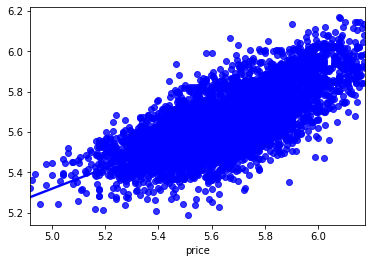

In [225]:
sns.regplot(y_test,predictions,color='b')

In [226]:
X_train_Sm= sm.add_constant(X_train)
result=sm.OLS(y_train,X_train_Sm).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     771.8
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        19:27:36   Log-Likelihood:                 4718.6
No. Observations:                9202   AIC:                            -9411.
Df Residuals:                    9189   BIC:                            -9319.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2914      0.151     28.366      

# Model Evaluation

In [227]:
rainbow_statistic, rainbow_p_value = linear_rainbow(result)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.0004345107841761 P_Value = 0.49413247461549337


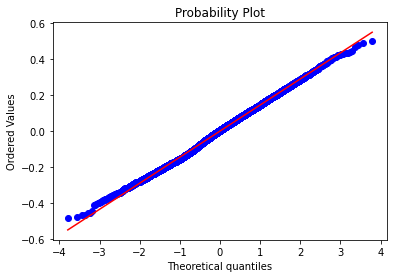

In [228]:
#NORMALITY
stats.probplot(result.resid, dist='norm',plot=pylab)
pylab.show()

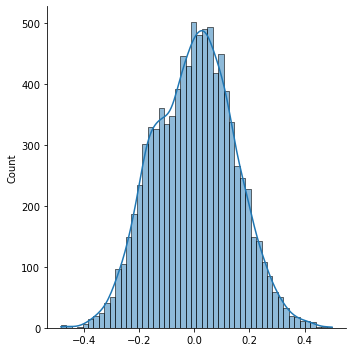

In [229]:
ax = sns.displot(result.resid,kde=True)

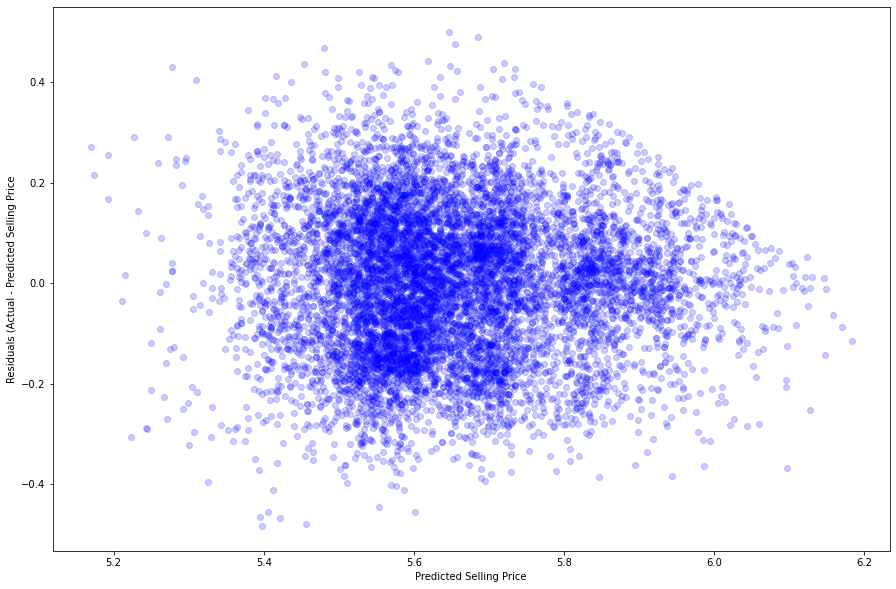

In [230]:
fig3, ax3 = plt.subplots(figsize=(15,10))
ax3.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax3.scatter(x=result.predict(),y=result.resid, color='blue', alpha=0.2);

In [231]:
from src.tools import h_b_test

In [232]:
h_b_test(result)

[('Lagrange multiplier statistic', 141.28380810237869), ('p-value', 3.2971210325831575e-24), ('f-value', 11.940344864917181), ('f p-value', 2.0977199331514736e-24)]
A Breusch-Pagan test uses the following null and alternative hypotheses:
 The null hypothesis (H0): Homoscedasticity is present.
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)
We see that the Lagrange multiplier statistic for the test is 141.28380810237869  and the corresponding p-value is 0.00000.
Because this p-value is less than alpha = 0.05, we have enough evidence to reject the null hypothesis.
We have sufficient evidence to say that heteroscedasticity is present in the regression model.


# A Breusch-Pagan test uses the following null and alternative hypotheses:

The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

We see that the Lagrange multiplier statistic for the test is $512$ and the corresponding p-value is $1.09e^{-103}$. Because this p-value is less than $\alpha = 0.05$, we have enough evidence to reject the null hypothesis. We have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [53]:
# DROP THE OUTLIERS
df = data.copy()
cutoff_plus = df.price.mean() + 3*df.price.std()
cutoff_minus = df.price.mean() - 3*df.price.std()
idx = df[(df.price < cutoff_minus) | (df.price > cutoff_plus) ].index
new_df = df.drop(idx)

In [54]:
df = new_df.copy()

------------------------------------------------------------
MODEL SUMMARY:
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     95.98
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        14:02:45   Log-Likelihood:            -1.9694e+05
No. Observations:               15054   AIC:                         3.947e+05
Df Residuals:                   14667   BIC:                         3.976e+05
Df Model:                         386                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.02

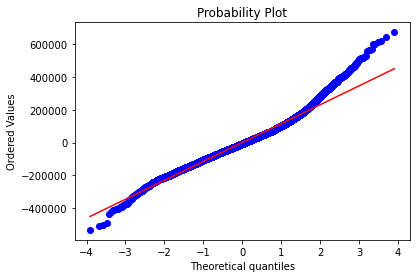

	DESTRIBUTIONS PLOT OF RESIDUALS



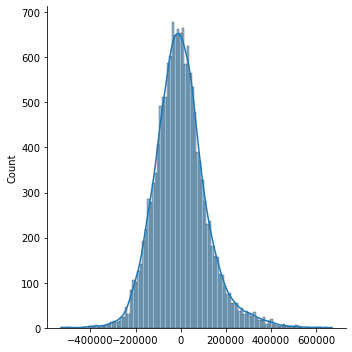

Shapiro-Wilk for Normality
stat=0.976, p=0.000
Probability is not Normal
D_Agostino Test for Normality:
stat=1365.851, p=0.000
Probability is not Normal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


/Users/yevgeniykostrov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


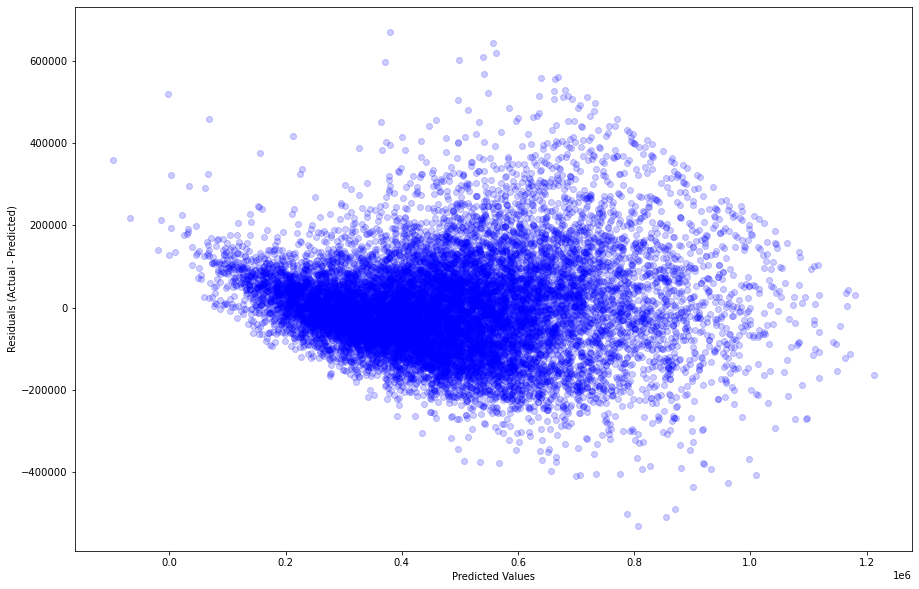

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [55]:
evaluate_model(df, target_column='price',multicollinearity=False)

In [8]:
f = formula(df[['price','sqft_living','grade']], 'price')

In [9]:
model = sm.OLS.from_formula(f,data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        11:27:49   Log-Likelihood:            -2.8659e+05
No. Observations:               21191   AIC:                         5.732e+05
Df Residuals:                   21188   BIC:                         5.732e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.369e+05   9881.306    -44.212      0.000   -4.56e+05   -4.17e+05
sqft_living   114.6516      2.201     52.101      0.000     110.338     118.965
grade        9.347e+04   1660.479     56.290      0.000    9.02e+04    9.67e+04
==============================================================================
Omnibus:                     3785.973   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8565.757
Skew:                           1.030   Prob(JB):                         0.00
Kurtosis:                       5.336   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
rainbow_statistic, rainbow_p_value = linear_rainbow(result)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 0.9959299279369512 P_Value = 0.5831209404204829


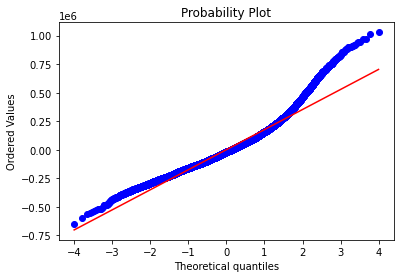

In [11]:
stats.probplot(result.resid, dist='norm',plot=pylab)
pylab.show()

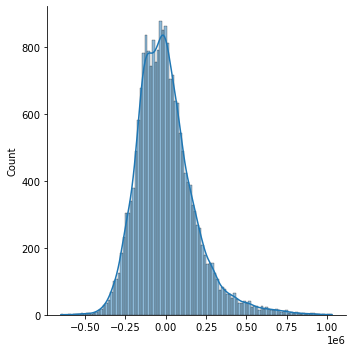

In [12]:
ax = sns.displot(result.resid,kde=True)

In [81]:
shapiro_wilk(result)
D_Agostino(result)

Shapiro-Wilk
stat=0.976, p=0.000
Probability is not Normal
D_Agostino:
stat=1138.640, p=0.000
Probability is not Normal


/Users/yevgeniykostrov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


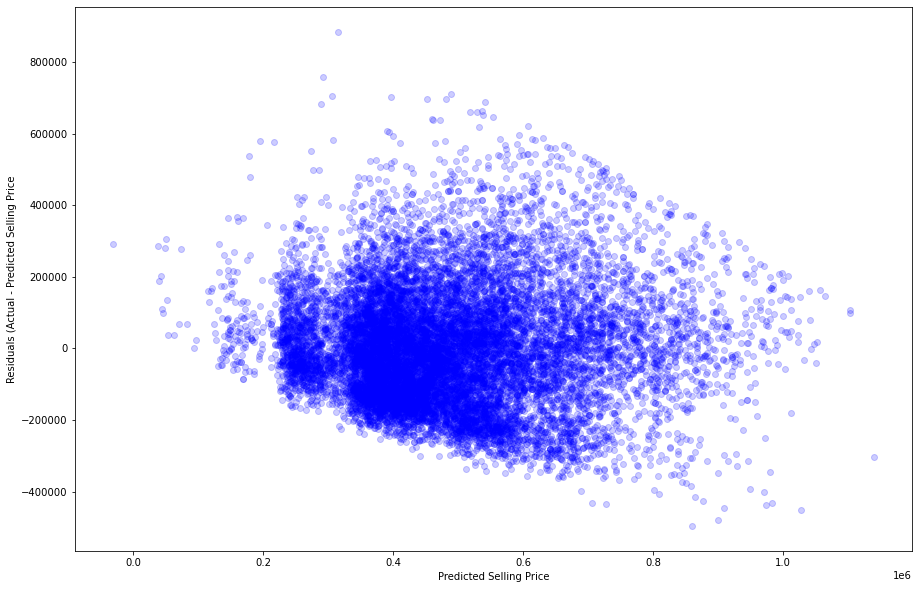

In [82]:
fig3, ax3 = plt.subplots(figsize=(15,10))
ax3.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax3.scatter(x=result.predict(),y=result.resid, color='blue', alpha=0.2);

In [98]:
test = het_breuschpagan(result.resid, result.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 489.1526459170889),
 ('p-value', 1.0700398304198345e-105),
 ('f-value', 168.48207976557782),
 ('f p-value', 1.9680047162933327e-107)]

# New Section

In [99]:
new_df = df[['price','sqft_living','grade', 'sqft_living15']]
f = formula(new_df, 'price')

In [107]:
model = sm.OLS.from_formula(f,data=new_df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4628.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        11:37:24   Log-Likelihood:            -2.0151e+05
No. Observations:               15054   AIC:                         4.030e+05
Df Residuals:                   15050   BIC:                         4.031e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.152e+05   1.05e+04    -30.095      0.000   -3.36e+05   -2.95e+05
sqft_living      85.1741      2.736     31.127      0.000      79.810      90.538
grade          7.386e+04   1842.905     40.079      0.000    7.02e+04    7.75e+04
sqft_living15    37.1824      3.249     11.445      0.000      30.814      43.551
==============================================================================
Omnibus:                     1074.660   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.388
Skew:                           0.653   Prob(JB):                    6.58e-301
Kurtosis:                       3.706   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
rainbow_statistic, rainbow_p_value = linear_rainbow(result)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.0036803941870154 P_Value = 0.43670417312608956


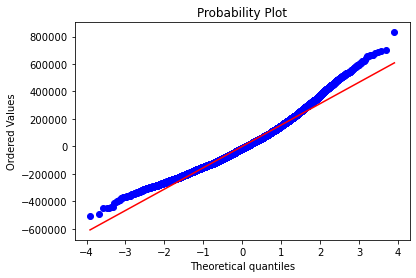

In [109]:
stats.probplot(result.resid, dist='norm',plot=pylab)
pylab.show()

In [110]:
y = new_df['price']
y_hat = result.predict()

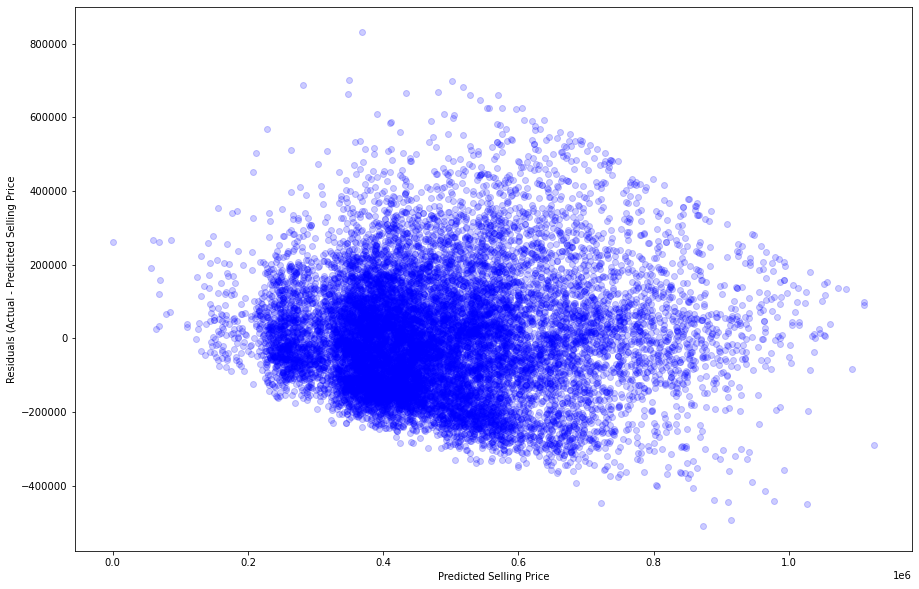

In [114]:
fig4, ax4 = plt.subplots(figsize=(15,10))
ax4.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax4.scatter(x=result.predict(),y=result.resid, color='blue', alpha=0.2);
t = np.arange()
ax4.plot([0])